In [1]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

# Vertical intervals: lines, crossbars & errorbars

Various ways of representing a vertical interval defined by x, ymin and ymax. Each case draws a single graphical object.

```R
geom_crossbar(
  mapping = NULL,
  data = NULL,
  stat = "identity",
  position = "identity",
  ...,
  fatten = 2.5,
  na.rm = FALSE,
  orientation = NA,
  show.legend = NA,
  inherit.aes = TRUE
)

geom_errorbar(
  mapping = NULL,
  data = NULL,
  stat = "identity",
  position = "identity",
  ...,
  na.rm = FALSE,
  orientation = NA,
  show.legend = NA,
  inherit.aes = TRUE
)

geom_linerange(
  mapping = NULL,
  data = NULL,
  stat = "identity",
  position = "identity",
  ...,
  na.rm = FALSE,
  orientation = NA,
  show.legend = NA,
  inherit.aes = TRUE
)

geom_pointrange(
  mapping = NULL,
  data = NULL,
  stat = "identity",
  position = "identity",
  ...,
  fatten = 4,
  na.rm = FALSE,
  orientation = NA,
  show.legend = NA,
  inherit.aes = TRUE
)
```

**Argument**  
`fatten`	
A multiplicative factor used to increase the size of the middle bar in geom_crossbar() and the middle point in geom_pointrange().

### Aesthetics

**`geom_linerange()`** understands the following aesthetics (required aesthetics are in bold):

* **x** or **y**

* **ymin** or **xmin**

* **ymax** or **xmax**

* alpha

* colour

* group

* linetype

* size

In [4]:
# Create a simple example dataset
df <- data.frame(
  trt = factor(c(1, 1, 2, 2)),
  resp = c(1, 5, 3, 4),
  group = factor(c(1, 2, 1, 2)),
  upper = c(1.1, 5.3, 3.3, 4.2),
  lower = c(0.8, 4.6, 2.4, 3.6)
)
df

trt,resp,group,upper,lower
1,1,1,1.1,0.8
1,5,2,5.3,4.6
2,3,1,3.3,2.4
2,4,2,4.2,3.6


In [9]:
g <- ggplot(df, aes(trt, resp, color = group))

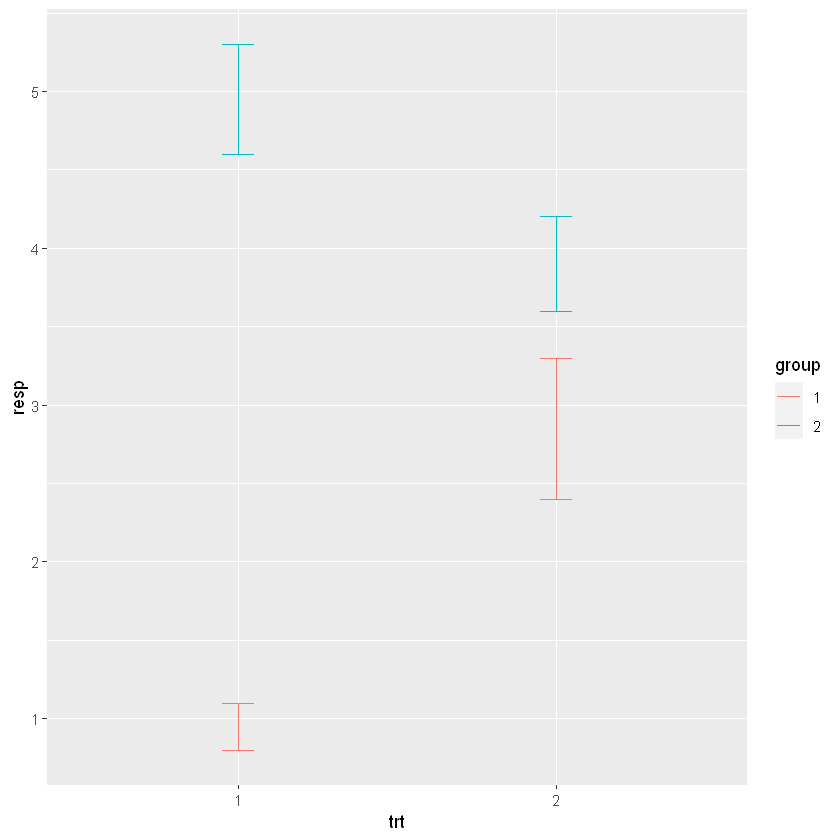

In [13]:
g + geom_errorbar(aes(ymin = lower, ymax = upper), width = .1) #set the width of horizontal line on each error 

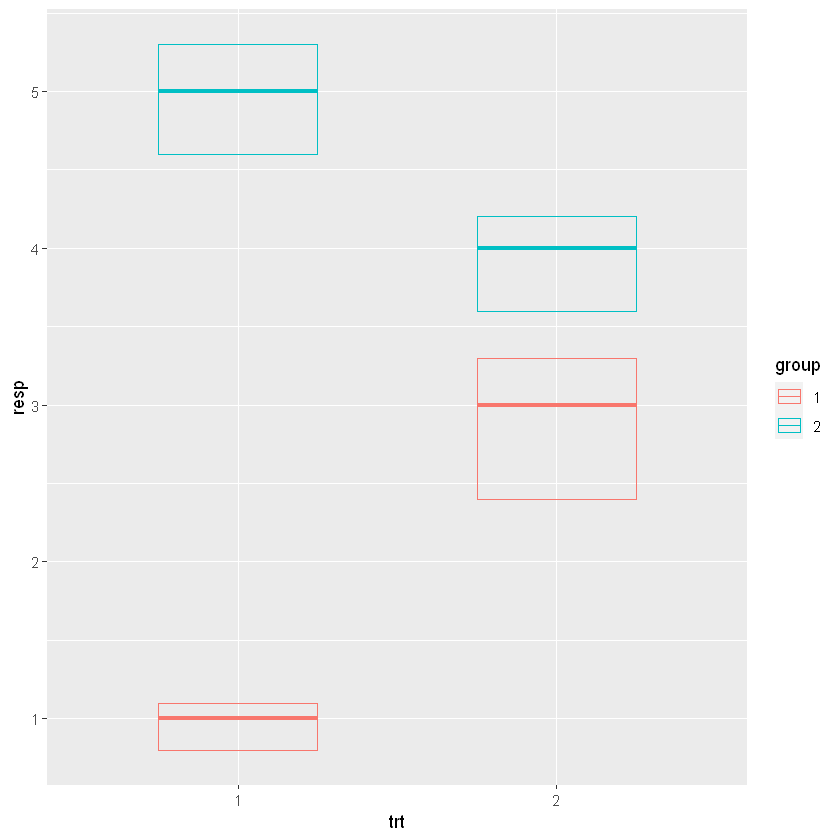

In [17]:
g + geom_crossbar(aes(ymin = lower, ymax = upper), width = .5) #set the width of the box

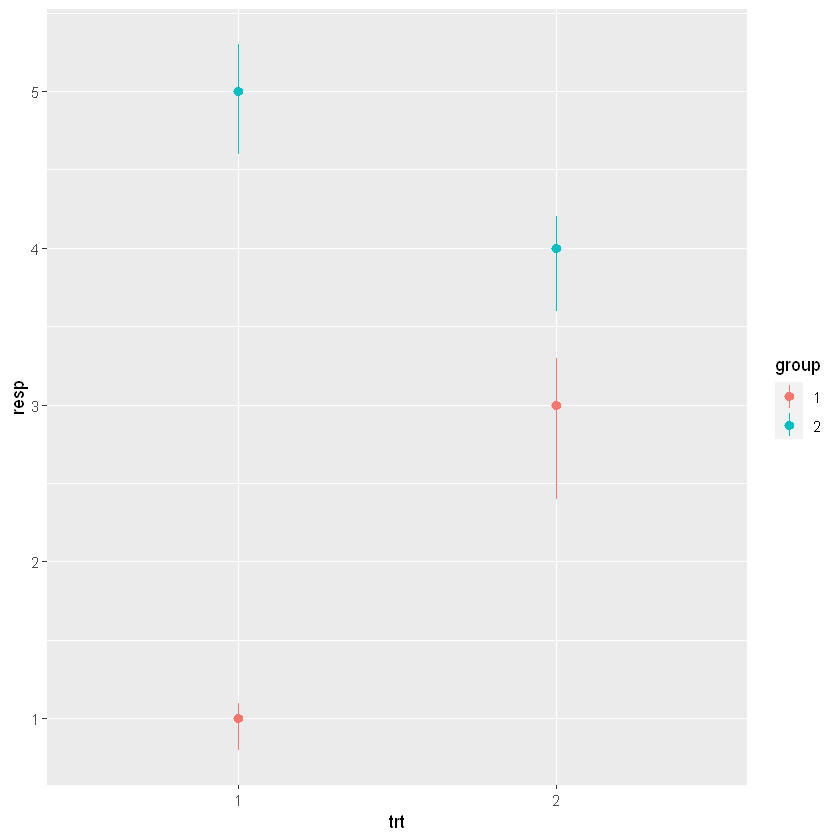

In [20]:
g + geom_pointrange(aes(ymin = lower, ymax = upper))

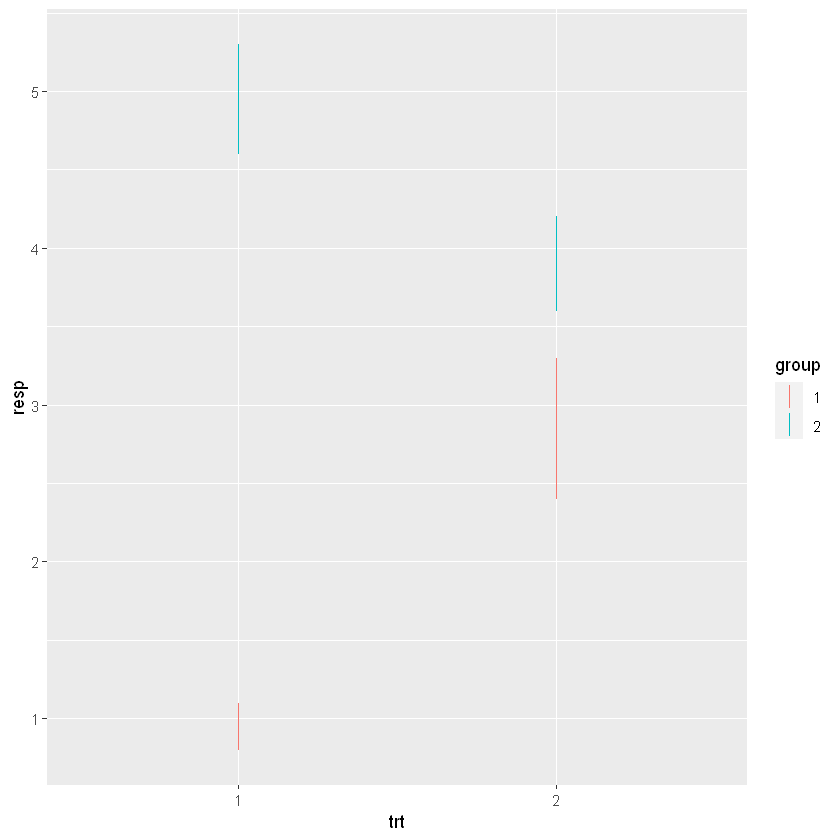

In [21]:
g + geom_linerange(aes(ymin = lower, ymax = upper))

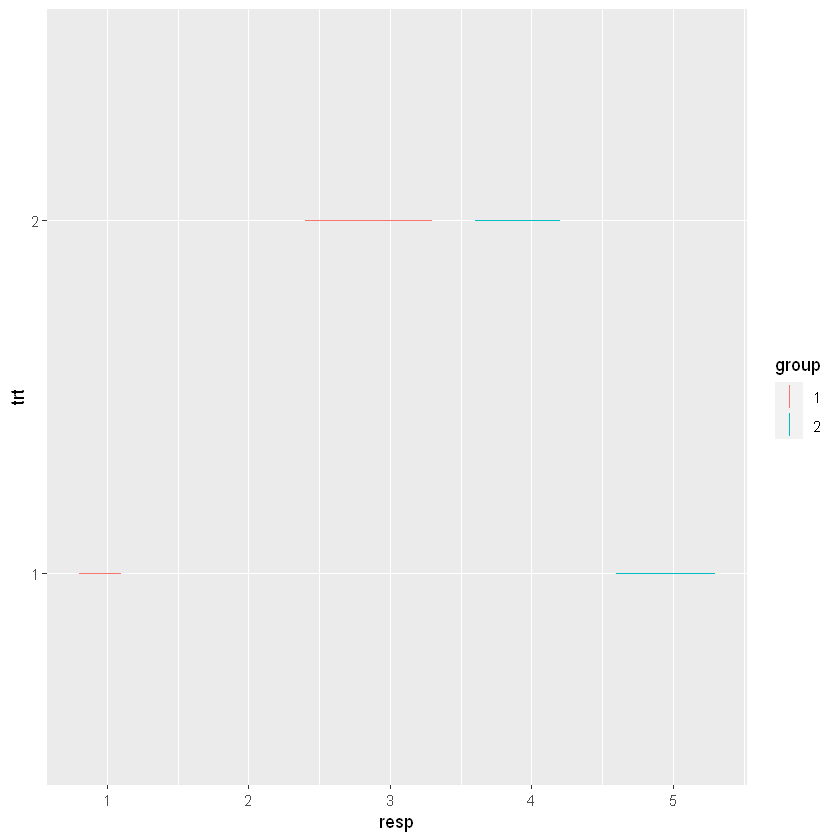

In [22]:
# Flip the orientation by changing mapping
ggplot(df, aes(resp, trt, colour = group)) +
  geom_linerange(aes(xmin = lower, xmax = upper))

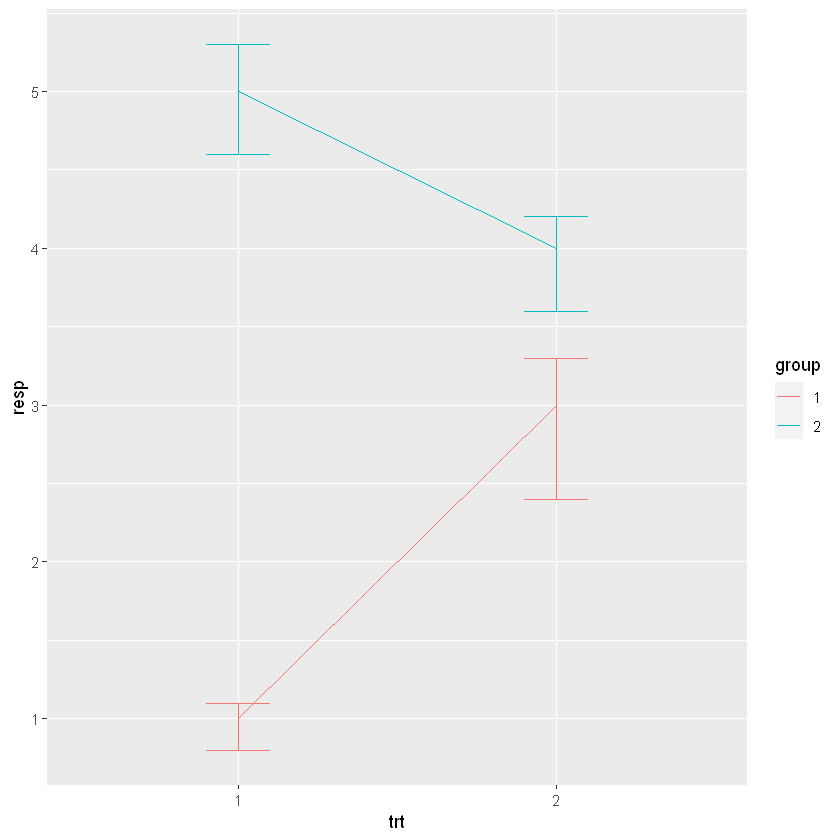

In [27]:
# Draw lines connecting group means
g +
geom_line(aes(group = group)) +
geom_errorbar(aes(ymin = lower, ymax = upper), width = 0.2)

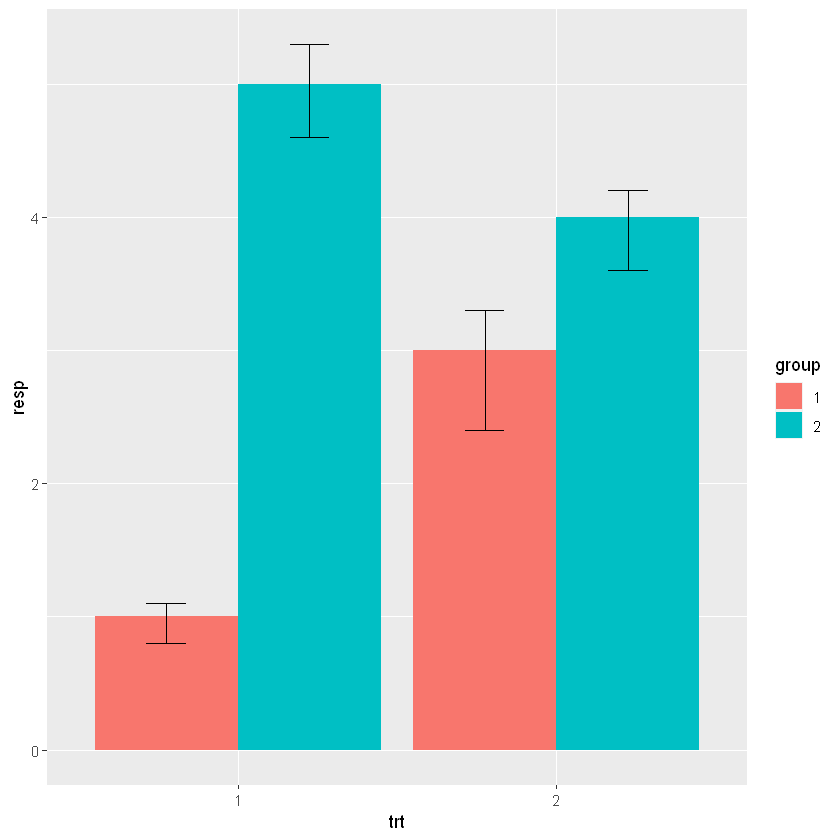

In [30]:
# If you want to dodge bars and errorbars, you need to manually
# specify the dodge width
p <- ggplot(df, aes(trt, resp, fill = group))
p +
geom_col(position = "dodge") +
geom_errorbar(aes(ymin = lower, ymax = upper), position = position_dodge(.9), width = 0.25)

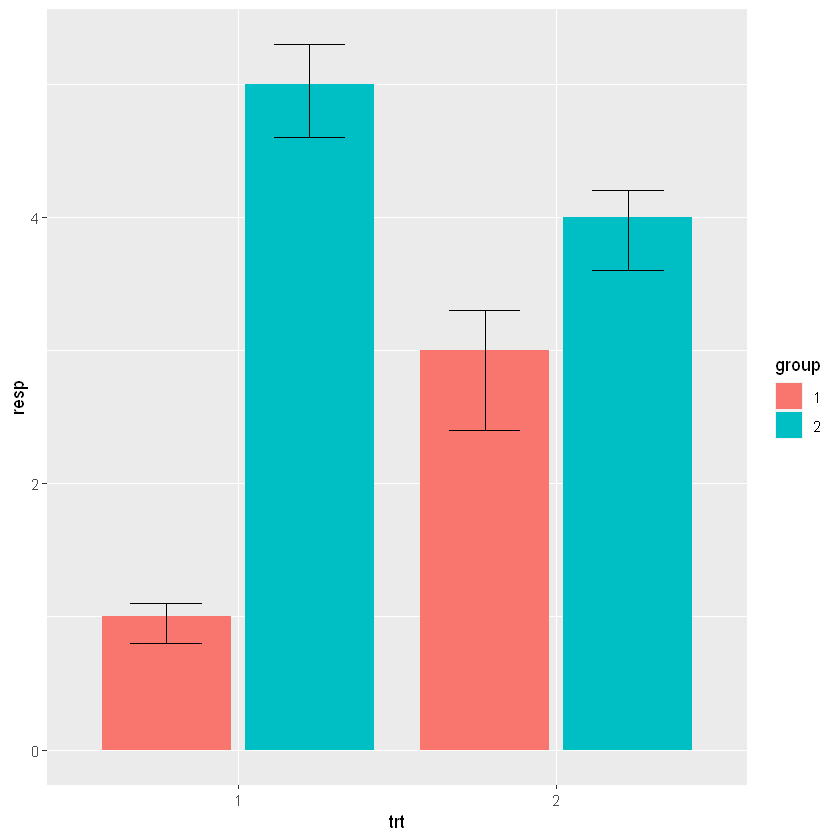

In [31]:
# When using geom_errorbar() with position_dodge2(), extra padding will be
# needed between the error bars to keep them aligned with the bars.
p +
geom_col(position = "dodge2") +
geom_errorbar(
  aes(ymin = lower, ymax = upper),
  position = position_dodge2(width = 0.5, padding = 0.5)
)


# Horizontal error bars

A rotated version of geom_errorbar().

In [3]:
args(geom_errorbarh)

function (mapping = NULL, data = NULL, stat = "identity", position = "identity", 
    ..., na.rm = FALSE, show.legend = NA, inherit.aes = TRUE) 
NULL

**`geom_errorbarh()`** understands the following aesthetics (required aesthetics are in bold):

* **xmin**

* **xmax**

* **y**

* alpha

* colour

* group

* height

* linetype

* size

In [5]:
df <- data.frame(
  trt = factor(c(1, 1, 2, 2)),
  resp = c(1, 5, 3, 4),
  group = factor(c(1, 2, 1, 2)),
  se = c(0.1, 0.3, 0.3, 0.2)
)
df

trt,resp,group,se
1,1,1,0.1
1,5,2,0.3
2,3,1,0.3
2,4,2,0.2


In [6]:
# Define the top and bottom of the errorbars
p <- ggplot(df, aes(resp, trt, colour = group))

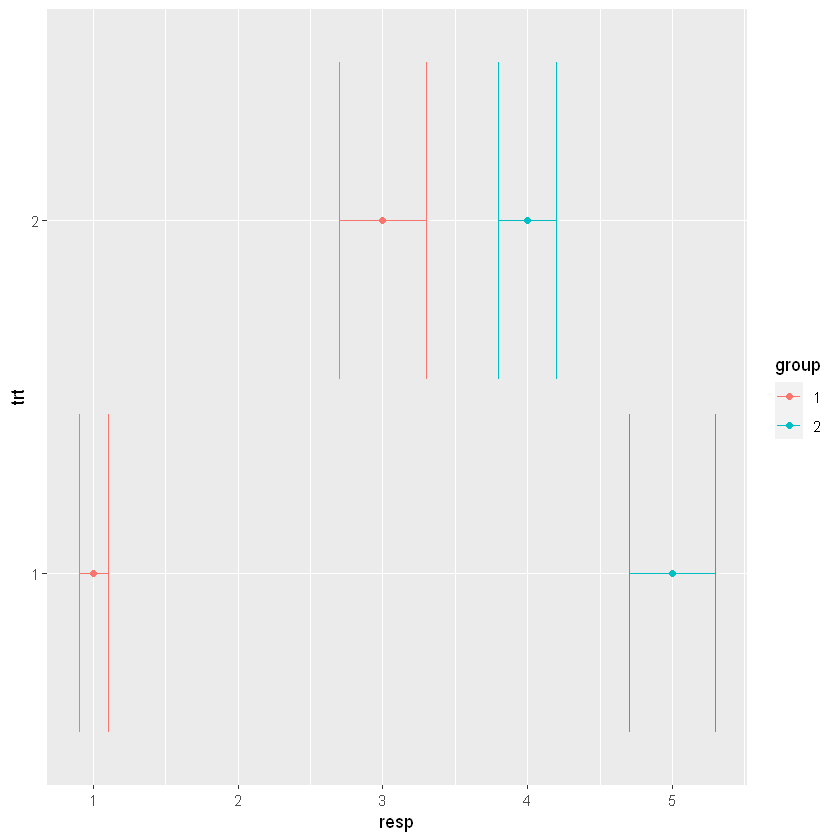

In [7]:
p + geom_point() +
  geom_errorbarh(aes(xmax = resp + se, xmin = resp - se))

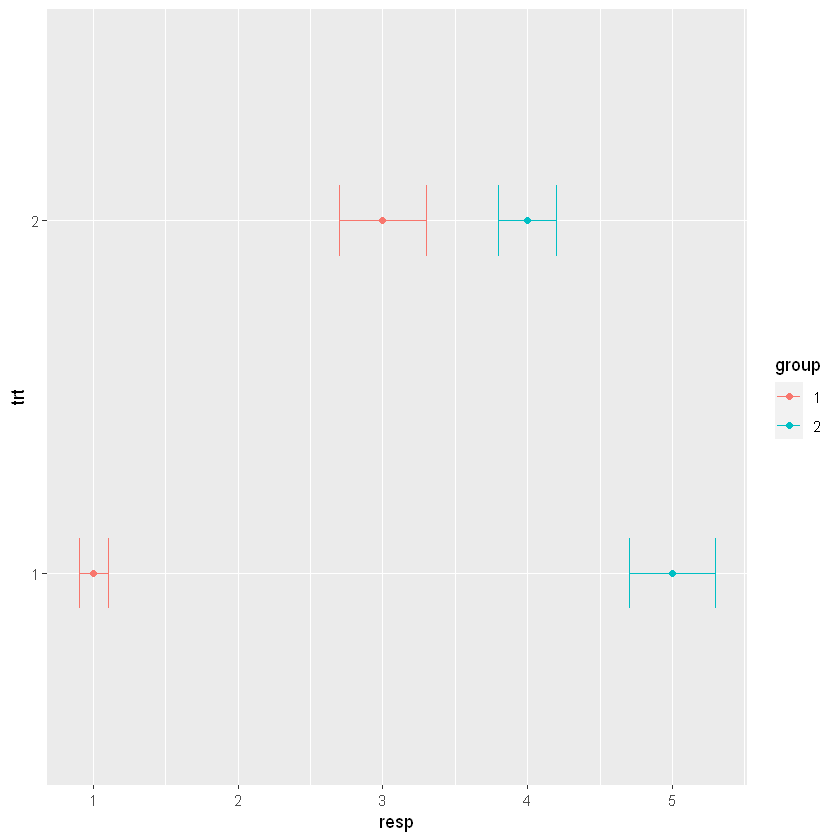

In [8]:
p + geom_point() +
geom_errorbarh(aes(xmax = resp + se, xmin = resp - se, height = .2))